In [1]:
#Actividad - Modulo 9) Aprendizaje de redes neuronales
#Alumno: Diego Di Stefano (Legajo 134844)

import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

# Cargar el conjunto de datos Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizar los datos
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Codificar las etiquetas de clase
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reescalar las imágenes para que tengan la forma correcta para la CNN (agregar una dimensión)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Visualizar la forma de los datos
print("Shape of training data:", x_train.shape)
print("Shape of testing data:", x_test.shape)


4422102/4422102 [==============================] - 0s 0us/step
Shape of training data: (60000, 28, 28, 1)
Shape of testing data: (10000, 28, 28, 1)


In [2]:
# Definir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [3]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/10
938/938 [==============================] - 55s 58ms/step - loss: 0.5517 - accuracy: 0.7968 - val_loss: 0.4004 - val_accuracy: 0.8545
Epoch 2/10
938/938 [==============================] - 54s 58ms/step - loss: 0.3480 - accuracy: 0.8738 - val_loss: 0.3558 - val_accuracy: 0.8720
Epoch 3/10
938/938 [==============================] - 55s 59ms/step - loss: 0.2970 - accuracy: 0.8916 - val_loss: 0.3098 - val_accuracy: 0.8888
Epoch 4/10
938/938 [==============================] - 52s 55ms/step - loss: 0.2669 - accuracy: 0.9016 - val_loss: 0.2898 - val_accuracy: 0.8927
Epoch 5/10
938/938 [==============================] - 51s 55ms/step - loss: 0.2435 - accuracy: 0.9108 - val_loss: 0.2804 - val_accuracy: 0.8970
Epoch 6/10
938/938 [==============================] - 52s 55ms/step - loss: 0.2265 - accuracy: 0.9159 - val_loss: 0.2711 - val_accuracy: 0.9041
Epoch 7/10
938/938 [==============================] - 54s 58ms/step - loss: 0.2087 - accuracy: 0.9230 - val_loss: 0.2653 - val_accuracy:

313/313 [==============================] - 3s 9ms/step - loss: 0.2763 - accuracy: 0.9060
Test accuracy: 0.906000018119812


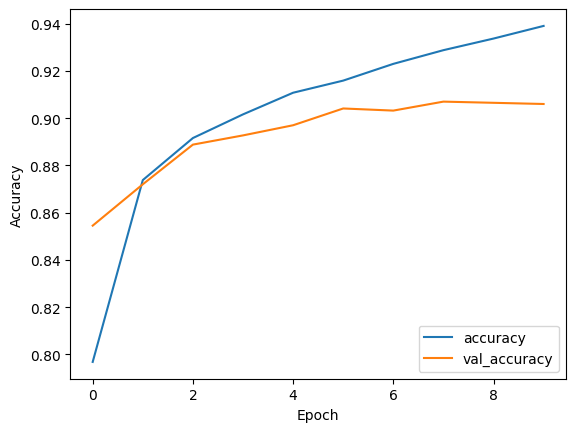

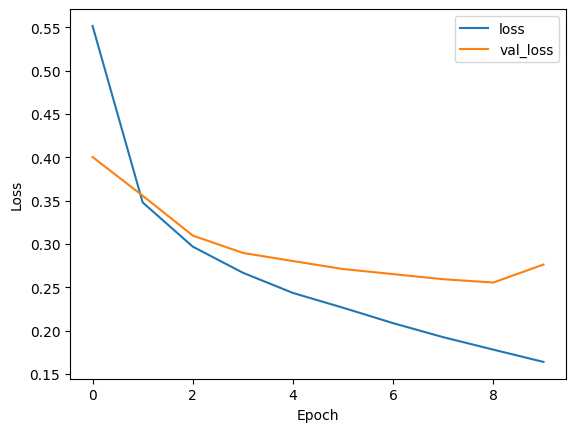

In [4]:
# Evaluar el modelo con los datos de prueba
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test accuracy:", test_accuracy)

# Visualizar la precisión y la pérdida durante el entrenamiento
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()
